<a href="https://colab.research.google.com/github/AthaSSiN/ACA_PML/blob/master/ACA_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
(trainX, trainY) , (testX , testY) = mnist.load_data()

#normalizing train and test data
trainX = trainX/255
testX = testX/255

# converting data into tuple form of image and value (though not required)
train = [[trainX[i].reshape(784), trainY[i]] for i in range(len(trainX))]
test = [[testX[i].reshape(784), testY[i]] for i in range(len(testX))]

print(len(train))
print(len(train[0])) 



60000
2


In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [0]:
batchSize = 60000
epochs = 1
K = 3 0 #number of classes > 10 to increase accuracy of classifcationn
n = len(train)

pi = 0.1*np.ones(K)
print(pi)

mu = np.random.randn(K,784)/2 + 0.5 #centering mu about 0.5
 
print(mu)

sig = [np.identity(784) for i in range(K)]

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[[ 1.75842137  0.8833142   0.78150979 ... -0.20036333  0.28129798
   0.24756496]
 [ 0.7430448   0.5923171  -0.43384428 ... -0.03986223  0.92951392
  -0.19596597]
 [ 0.3359378   0.42525302 -0.56829765 ...  0.13882079  1.64162144
   0.68586377]
 ...
 [-0.2048462   0.4370007   0.78997192 ...  0.48698674  0.07125265
   1.2097546 ]
 [ 0.32644914  0.4577389   0.4491935  ...  0.32170258  0.49120901
  -0.47527374]
 [ 0.0740175   1.15274017  1.07103293 ...  0.21797289  1.3201329
   0.19362585]]


In [0]:
def calc(miniBatch,t, pi, mu, sig):
 
 #-----------------E step----------------------
  Ez = np.zeros((batchSize, K)) # expectancy values of z[i,j]
  temp = np.zeros((batchSize, 784)) # for storing values of input images

  for index, x in enumerate(miniBatch):
    print(index) # for knowing current iteration
    temp[index] = x[0]
    
    # omitting sigma terms in exponent as  it was initialized with identity and there's only 1 epoch
    vals = [pi[k]*np.exp(-0.5*np.dot(temp[index]-mu[:][k], temp[index]-mu[:][k])) for k in range(K)]
    valSum = np.sum(vals)
    Ez[index] = [vals[p]/valSum for p in range(K)]

  #-----------------M step ------------------------ 
  print(Ez)

  Nk = np.sum(Ez, axis = 0) 
  pi = Nk/batchSize
  
  for k in range (K):
    mu[k] = np.sum((temp.T * Ez[:, k]).T, axis = 0) / Nk[k]
    sig[k] = [np.sum(((((temp[i] - mu[k]) ** 2).T * Ez[i, k])) , axis = 0) / Nk[k] for i in range(batchSize)]

In [0]:
for j in range (epochs):

  print(f"Epoch: {j+1}")

  Batches = [train[k : k + batchSize] for k in range(0, n, batchSize)]

  #train minibatches 
  for i, Batch in enumerate(Batches):
    calc(Batch, i, pi, mu, sig)


Streaming output truncated to the last 5000 lines.
55014
55015
55016
55017
55018
55019
55020
55021
55022
55023
55024
55025
55026
55027
55028
55029
55030
55031
55032
55033
55034
55035
55036
55037
55038
55039
55040
55041
55042
55043
55044
55045
55046
55047
55048
55049
55050
55051
55052
55053
55054
55055
55056
55057
55058
55059
55060
55061
55062
55063
55064
55065
55066
55067
55068
55069
55070
55071
55072
55073
55074
55075
55076
55077
55078
55079
55080
55081
55082
55083
55084
55085
55086
55087
55088
55089
55090
55091
55092
55093
55094
55095
55096
55097
55098
55099
55100
55101
55102
55103
55104
55105
55106
55107
55108
55109
55110
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
55126
55127
55128
55129
55130
55131
55132
55133
55134
55135
55136
55137
55138
55139
55140
55141
55142
55143
55144
55145
55146
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55160
55161
55162
55163
55164
55165
55166
55167
55168
55169
55170
55171
5

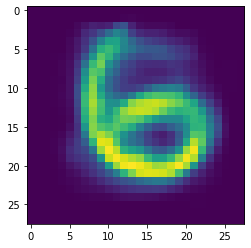

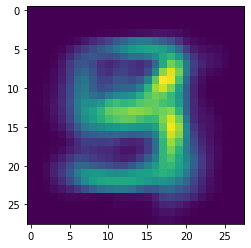

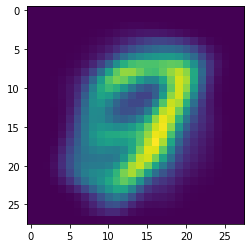

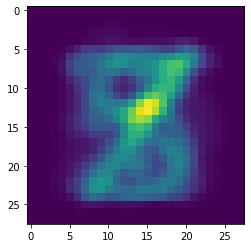

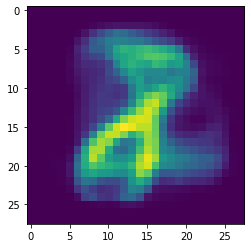

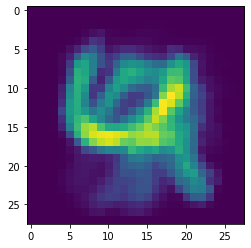

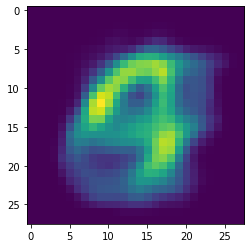

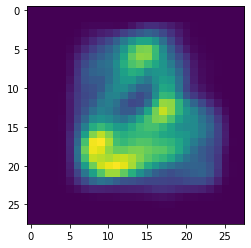

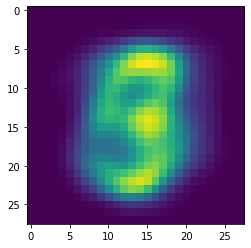

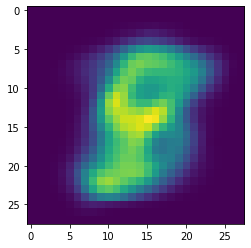

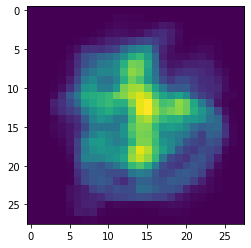

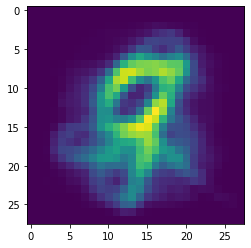

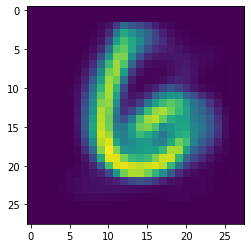

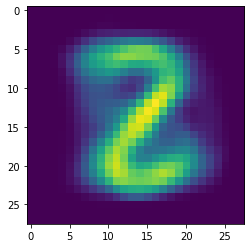

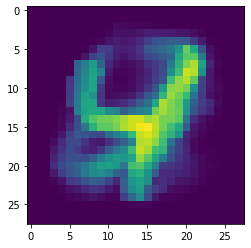

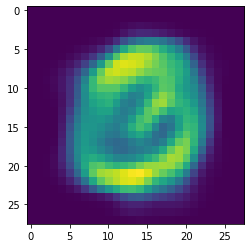

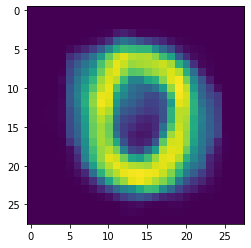

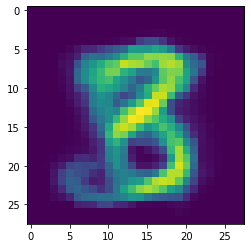

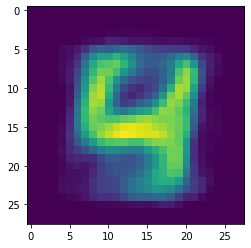

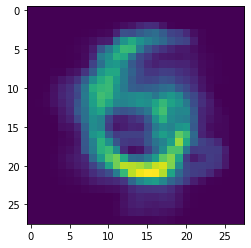

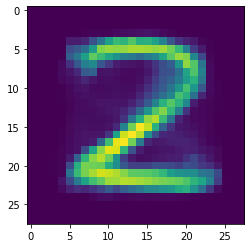

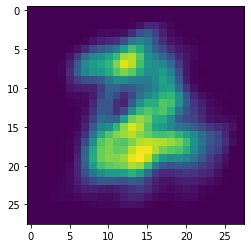

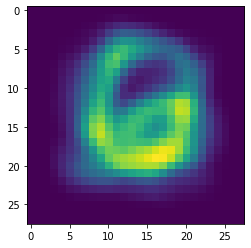

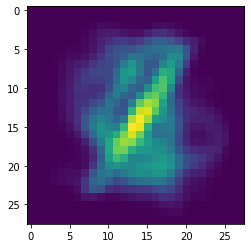

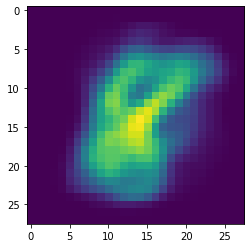

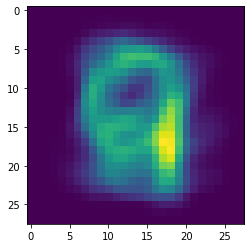

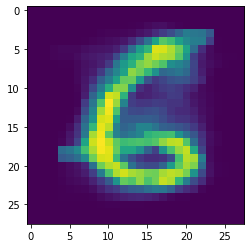

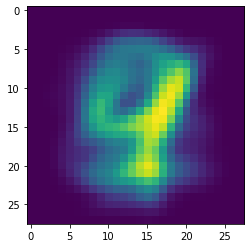

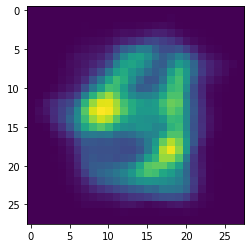

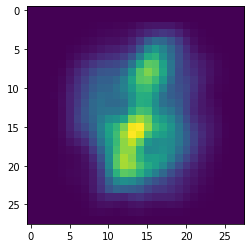

In [0]:
for i in range(K):
  plt.imshow(mu[i].reshape(28,28))
  plt.show()